#### Sr. Engineer: Dhruv Singh <br> Project Name: Success Classifier <br> Phase: Modelling - Hierarchical Clustering <br> Date Updated: 01/20/2022

# Chapter 4 - Clustering Models
## Segment 2 - Hierarchial methods
#### Setting up for clustering analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm

In [2]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [3]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [4]:
address = "C:/Dhruv/Data/4_Machine_Learning_with_Python/1_Python for Data Science Essential Training Part 2/Phase II - Modelling/2_Clustering_v1_01.20.2022/1_readonly/Services.csv"

does = pd.read_csv(address)

does = does.sample(n=5000)

does.columns = ['Age_AtReg', 'Disability', 'Gender', 'CitizenStatus', 'EducationLevel', 'Race_Hispanic', 'Race_NativeAmerican', 'Race_Asian', 'Race_AfricanAmerican', 'Race_PacificIslander', 'Race_White', 'Employed']

X = does[['Age_AtReg', 'Disability', 'Gender', 'CitizenStatus', 'EducationLevel', 'Race_Hispanic', 'Race_NativeAmerican', 'Race_Asian', 'Race_AfricanAmerican', 'Race_PacificIslander', 'Race_White']].values

y = does.iloc[:,(11)].values

### Using scipy to generate dendrograms

In [5]:
Z = linkage(X, 'ward')

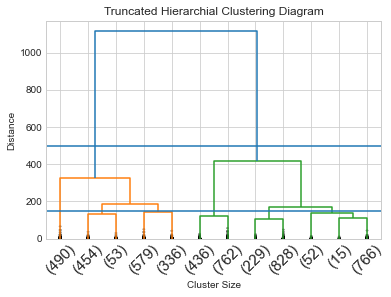

In [6]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

## Generating hierarchical clusters

In [7]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.5578

In [8]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.7196

In [9]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.7196